In [3]:
import pandas as pd
import numpy as np
import json
import datetime
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams["font.size"]=14
matplotlib.rcParams["figure.figsize"]=(8,6)
matplotlib.rcParams["figure.facecolor"]="#00000000"

import seaborn as sns
sns.set_style("darkgrid")
sns.set(font="Verdana")
import plotly.express as px

In [4]:
df_incident_day = pd.read_csv("data_semiclean/df_incident_day.csv", index_col=None)

In [5]:
df_incident_day

,Incident Date,Total Cases
0,2018-01-01,463
1,2018-01-02,327
2,2018-01-03,366
3,2018-01-04,385
4,2018-01-05,369
...,...,...
1776,2022-11-12,281
1777,2022-11-13,246
1778,2022-11-14,222
1779,2022-11-15,175


In [6]:
def date_split(df):
    df["Incident Date"] = pd.to_datetime(df["Incident Date"])
    df["dayofweek"] = df["Incident Date"].dt.dayofweek
    return(df)

In [7]:
date_split(df_incident_day)

,Incident Date,Total Cases,dayofweek
0,2018-01-01,463,0
1,2018-01-02,327,1
2,2018-01-03,366,2
3,2018-01-04,385,3
4,2018-01-05,369,4
...,...,...,...
1776,2022-11-12,281,5
1777,2022-11-13,246,6
1778,2022-11-14,222,0
1779,2022-11-15,175,1


In [8]:
df_incident_day["dayofweek"].unique()   # Monday = 0, Sunday = 6

array([0, 1, 2, 3, 4, 5, 6])

## Yesterday Cases

In [9]:
def yesterday_case(df):
    df["yesterday_cases"] = df["Total Cases"].shift(1)    
    return(df)

In [10]:
yesterday_case(df_incident_day)

,Incident Date,Total Cases,dayofweek,yesterday_cases
0,2018-01-01,463,0,NaN
1,2018-01-02,327,1,463.0
2,2018-01-03,366,2,327.0
3,2018-01-04,385,3,366.0
4,2018-01-05,369,4,385.0
...,...,...,...,...
1776,2022-11-12,281,5,262.0
1777,2022-11-13,246,6,281.0
1778,2022-11-14,222,0,246.0
1779,2022-11-15,175,1,222.0


## Weekly Average

In [11]:
def moving_avg_7(df):
    df["cases_average_7D"] = df["Total Cases"].rolling(7).mean().round(2).shift(1)    
    return(df)

In [12]:
moving_avg_7(df_incident_day)

,Incident Date,Total Cases,dayofweek,yesterday_cases,cases_average_7D
0,2018-01-01,463,0,NaN,NaN
1,2018-01-02,327,1,463.0,NaN
2,2018-01-03,366,2,327.0,NaN
3,2018-01-04,385,3,366.0,NaN
4,2018-01-05,369,4,385.0,NaN
...,...,...,...,...,...
1776,2022-11-12,281,5,262.0,255.00
1777,2022-11-13,246,6,281.0,259.14
1778,2022-11-14,222,0,246.0,264.00
1779,2022-11-15,175,1,222.0,258.86


## Monthly Average

In [13]:
def moving_avg_30(df):
    df["cases_average_30D"] = df["Total Cases"].rolling(30).mean().round(2).shift(1)    
    return(df)

In [14]:
moving_avg_30(df_incident_day)

,Incident Date,Total Cases,dayofweek,yesterday_cases,cases_average_7D,cases_average_30D
0,2018-01-01,463,0,NaN,NaN,NaN
1,2018-01-02,327,1,463.0,NaN,NaN
2,2018-01-03,366,2,327.0,NaN,NaN
3,2018-01-04,385,3,366.0,NaN,NaN
4,2018-01-05,369,4,385.0,NaN,NaN
...,...,...,...,...,...,...
1776,2022-11-12,281,5,262.0,255.00,286.50
1777,2022-11-13,246,6,281.0,259.14,285.70
1778,2022-11-14,222,0,246.0,264.00,282.70
1779,2022-11-15,175,1,222.0,258.86,279.63


## Drop NA Rows

In [15]:
len(df_incident_day)

1781

In [16]:
df_incident_day = df_incident_day.dropna()
len(df_incident_day)

1751

In [17]:
df_incident_day

,Incident Date,Total Cases,dayofweek,yesterday_cases,cases_average_7D,cases_average_30D
30,2018-01-31,384,2,365.0,368.43,356.10
31,2018-02-01,387,3,384.0,373.71,353.47
32,2018-02-02,365,4,387.0,372.43,355.47
33,2018-02-03,340,5,365.0,367.43,355.43
34,2018-02-04,290,6,340.0,362.86,353.93
...,...,...,...,...,...,...
1776,2022-11-12,281,5,262.0,255.00,286.50
1777,2022-11-13,246,6,281.0,259.14,285.70
1778,2022-11-14,222,0,246.0,264.00,282.70
1779,2022-11-15,175,1,222.0,258.86,279.63


## Keep Columns

#### Set Incident Date to be index

In [18]:
df_incident_day.set_index("Incident Date", inplace=True)

In [19]:
df_incident_day

,Total Cases,dayofweek,yesterday_cases,cases_average_7D,cases_average_30D
Incident Date,,,,,
2018-01-31,384,2,365.0,368.43,356.10
2018-02-01,387,3,384.0,373.71,353.47
2018-02-02,365,4,387.0,372.43,355.47
2018-02-03,340,5,365.0,367.43,355.43
2018-02-04,290,6,340.0,362.86,353.93
...,...,...,...,...,...
2022-11-12,281,5,262.0,255.00,286.50
2022-11-13,246,6,281.0,259.14,285.70
2022-11-14,222,0,246.0,264.00,282.70


## Train Test Split

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics  import mean_squared_error, r2_score
from sklearn.svm import SVR

In [21]:
filt1 = df_incident_day.index < "2022-08-01"
filt2 = df_incident_day.index >= "2022-08-01"

In [22]:
train_set = df_incident_day[filt1]
test_set  = df_incident_day[filt2]

In [23]:
train_set

,Total Cases,dayofweek,yesterday_cases,cases_average_7D,cases_average_30D
Incident Date,,,,,
2018-01-31,384,2,365.0,368.43,356.10
2018-02-01,387,3,384.0,373.71,353.47
2018-02-02,365,4,387.0,372.43,355.47
2018-02-03,340,5,365.0,367.43,355.43
2018-02-04,290,6,340.0,362.86,353.93
...,...,...,...,...,...
2022-07-27,328,2,325.0,304.43,319.30
2022-07-28,334,3,328.0,298.14,318.97
2022-07-29,317,4,334.0,303.86,320.07


In [24]:
test_set

,Total Cases,dayofweek,yesterday_cases,cases_average_7D,cases_average_30D
Incident Date,,,,,
2022-08-01,315,0,285.0,309.00,316.77
2022-08-02,291,1,315.0,314.00,316.50
2022-08-03,319,2,291.0,309.14,316.23
2022-08-04,337,3,319.0,307.86,317.17
2022-08-05,346,4,337.0,308.29,317.67
...,...,...,...,...,...
2022-11-12,281,5,262.0,255.00,286.50
2022-11-13,246,6,281.0,259.14,285.70
2022-11-14,222,0,246.0,264.00,282.70


## Scale Numeric Columns

In [25]:
numeric_cols = ["yesterday_cases", "cases_average_7D", "cases_average_30D"]

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
scaler = MinMaxScaler()

In [28]:
scaler.fit(train_set[numeric_cols])

MinMaxScaler()

In [29]:
train_set[numeric_cols] = scaler.transform(train_set[numeric_cols])

/var/folders/77/506sgzjs15b84ns9yp8cp2rc0000gn/T/ipykernel_64755/3017575333.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set[numeric_cols] = scaler.transform(train_set[numeric_cols])


In [30]:
train_set

,Total Cases,dayofweek,yesterday_cases,cases_average_7D,cases_average_30D
Incident Date,,,,,
2018-01-31,384,2,0.534060,0.882847,0.871611
2018-02-01,387,3,0.585831,0.908621,0.856143
2018-02-02,365,4,0.594005,0.902372,0.867906
2018-02-03,340,5,0.534060,0.877965,0.867670
2018-02-04,290,6,0.465940,0.855658,0.858848
...,...,...,...,...,...
2022-07-27,328,2,0.425068,0.570438,0.655178
2022-07-28,334,3,0.433243,0.539734,0.653238
2022-07-29,317,4,0.449591,0.567656,0.659707


In [31]:
test_set[numeric_cols] = scaler.transform(test_set[numeric_cols])  # only transform on test_set

/var/folders/77/506sgzjs15b84ns9yp8cp2rc0000gn/T/ipykernel_64755/3735379440.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set[numeric_cols] = scaler.transform(test_set[numeric_cols])  # only transform on test_set


In [32]:
test_set

,Total Cases,dayofweek,yesterday_cases,cases_average_7D,cases_average_30D
Incident Date,,,,,
2022-08-01,315,0,0.316076,0.592746,0.640299
2022-08-02,291,1,0.397820,0.617153,0.638711
2022-08-03,319,2,0.332425,0.593430,0.637123
2022-08-04,337,3,0.408719,0.587181,0.642651
2022-08-05,346,4,0.457766,0.589280,0.645592
...,...,...,...,...,...
2022-11-12,281,5,0.253406,0.329152,0.462271
2022-11-13,246,6,0.305177,0.349361,0.457566
2022-11-14,222,0,0.209809,0.373084,0.439922


## Encode Categorical Columns

In [33]:
categorical_cols = ["dayofweek"]

In [34]:
df_incident_day[categorical_cols].nunique()

dayofweek    7
dtype: int64

In [35]:
train_set  = pd.get_dummies(data=train_set, columns=categorical_cols)
train_set

,Total Cases,yesterday_cases,cases_average_7D,cases_average_30D,dayofweek_0,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6
Incident Date,,,,,,,,,,,
2018-01-31,384,0.534060,0.882847,0.871611,0,0,1,0,0,0,0
2018-02-01,387,0.585831,0.908621,0.856143,0,0,0,1,0,0,0
2018-02-02,365,0.594005,0.902372,0.867906,0,0,0,0,1,0,0
2018-02-03,340,0.534060,0.877965,0.867670,0,0,0,0,0,1,0
2018-02-04,290,0.465940,0.855658,0.858848,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
2022-07-27,328,0.425068,0.570438,0.655178,0,0,1,0,0,0,0
2022-07-28,334,0.433243,0.539734,0.653238,0,0,0,1,0,0,0
2022-07-29,317,0.449591,0.567656,0.659707,0,0,0,0,1,0,0


In [36]:
test_set  = pd.get_dummies(data=test_set, columns=categorical_cols)
test_set

,Total Cases,yesterday_cases,cases_average_7D,cases_average_30D,dayofweek_0,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6
Incident Date,,,,,,,,,,,
2022-08-01,315,0.316076,0.592746,0.640299,1,0,0,0,0,0,0
2022-08-02,291,0.397820,0.617153,0.638711,0,1,0,0,0,0,0
2022-08-03,319,0.332425,0.593430,0.637123,0,0,1,0,0,0,0
2022-08-04,337,0.408719,0.587181,0.642651,0,0,0,1,0,0,0
2022-08-05,346,0.457766,0.589280,0.645592,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2022-11-12,281,0.253406,0.329152,0.462271,0,0,0,0,0,1,0
2022-11-13,246,0.305177,0.349361,0.457566,0,0,0,0,0,0,1
2022-11-14,222,0.209809,0.373084,0.439922,1,0,0,0,0,0,0


In [37]:
X_train = train_set.drop(columns=["Total Cases"])
X_test = test_set.drop(columns=["Total Cases"])

In [38]:
y_train = train_set["Total Cases"]
y_test  = test_set["Total Cases"]

In [39]:
len(X_train.columns)

10

In [40]:
len(X_test.columns)

10

## Machine Learning

### Base

In [41]:
svr_base1 = SVR()

In [42]:
svr_base1.fit(X_train , y_train)

SVR()

In [43]:
pred_base1 = svr_base1.predict(X_test)

In [44]:
print(np.sqrt(mean_squared_error(y_test, pred_base1)))

33.61896439212646


In [45]:
print(r2_score(y_test, pred_base1))

0.38203202328681685


### Adjust Parameter

In [46]:
param_grid = {'kernel': ['linear'], 'C': [100,300, 500], 'epsilon': [0.00001, 0.0001, 0.001]}

In [47]:
svr = SVR()

In [48]:
%%time
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='r2')

CPU times: user 87 µs, sys: 290 µs, total: 377 µs
Wall time: 390 µs


In [49]:
%%time
grid_search.fit(X_train, y_train)

CPU times: user 3.89 s, sys: 22.8 ms, total: 3.92 s
Wall time: 3.92 s


GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [100, 300, 500],
                         'epsilon': [1e-05, 0.0001, 0.001],
                         'kernel': ['linear']},
             scoring='r2')

In [50]:
%%time
print(grid_search.best_params_)

{'C': 100, 'epsilon': 0.0001, 'kernel': 'linear'}
CPU times: user 20 µs, sys: 2 µs, total: 22 µs
Wall time: 25 µs


In [51]:
svr_best = grid_search.best_estimator_

In [52]:
pred_svr_adjusted = svr_best.predict(X_test)

In [53]:
print(np.sqrt(mean_squared_error(y_test, pred_svr_adjusted)))

31.32712156647323


In [54]:
print(r2_score(y_test, pred_svr_adjusted))

0.4634152905802199


In [306]:
df_compare = pd.DataFrame(columns=["actual_cases", "predicted_cases"])
df_compare

,actual_cases,predicted_cases


In [307]:
df_compare["actual_cases"] = test_set["Total Cases"]

In [308]:
df_compare

,actual_cases,predicted_cases
Incident Date,,
2022-08-01,315,NaN
2022-08-02,291,NaN
2022-08-03,319,NaN
2022-08-04,337,NaN
2022-08-05,346,NaN
...,...,...
2022-11-12,281,NaN
2022-11-13,246,NaN
2022-11-14,222,NaN


In [309]:
df_compare["predicted_cases"] = pred_svr_adjusted

In [310]:
df_compare

,actual_cases,predicted_cases
Incident Date,,
2022-08-01,315,311.840227
2022-08-02,291,311.346129
2022-08-03,319,318.429280
2022-08-04,337,309.588616
2022-08-05,346,334.707216
...,...,...
2022-11-12,281,270.024355
2022-11-13,246,251.536410
2022-11-14,222,274.751543


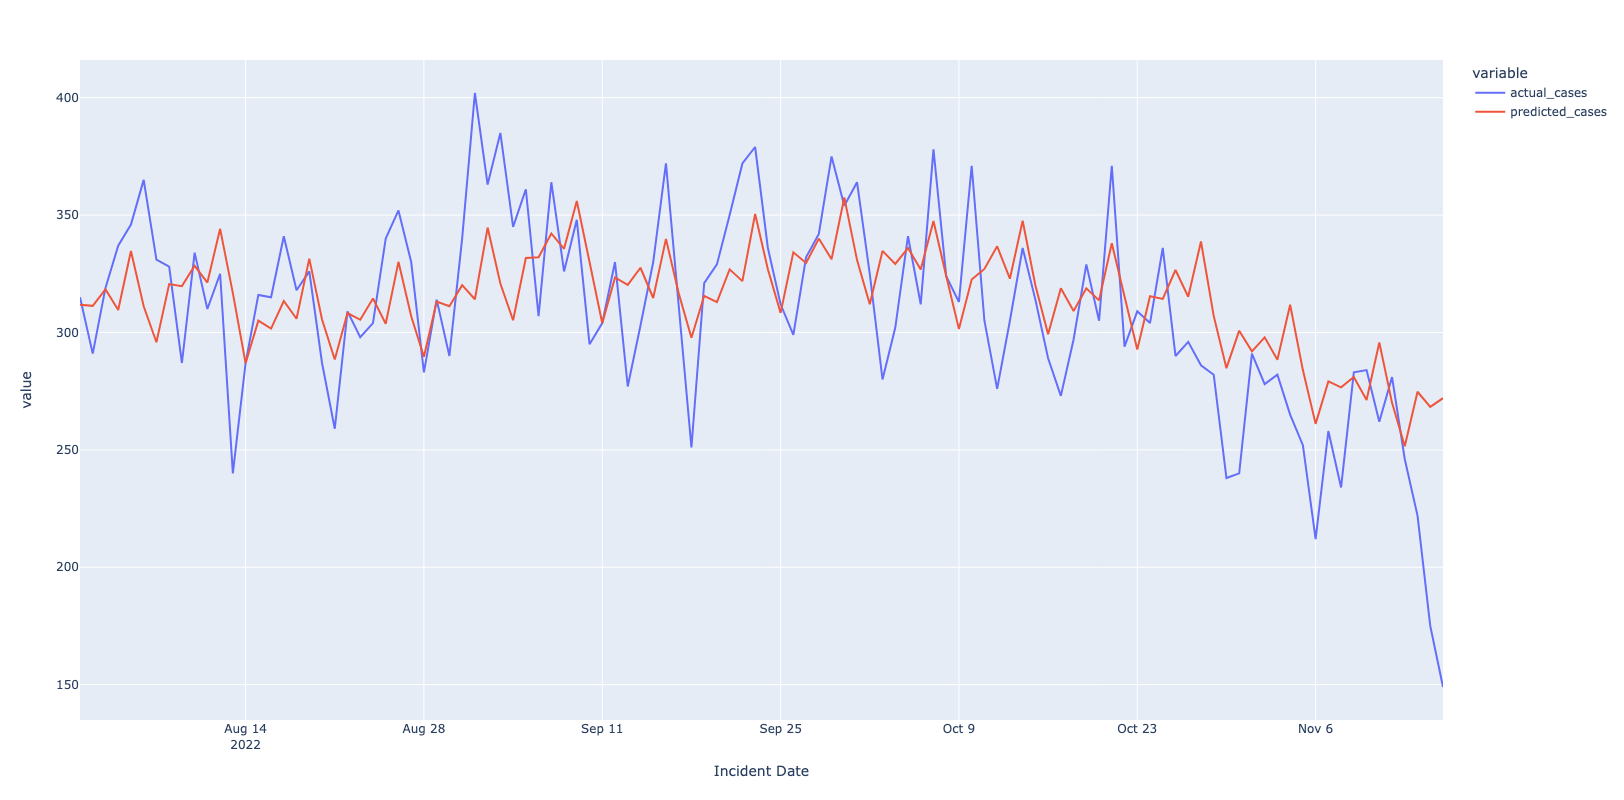

In [326]:
fig = px.line(df_compare, x=df_compare.index, y= ['actual_cases', 'predicted_cases'], width=1200, height=800)
fig.show()